In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv('House_train.csv',usecols=['GarageQual','SalePrice','FireplaceQu'])

In [6]:
df.columns


Index(['FireplaceQu', 'GarageQual', 'SalePrice'], dtype='object')

In [8]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

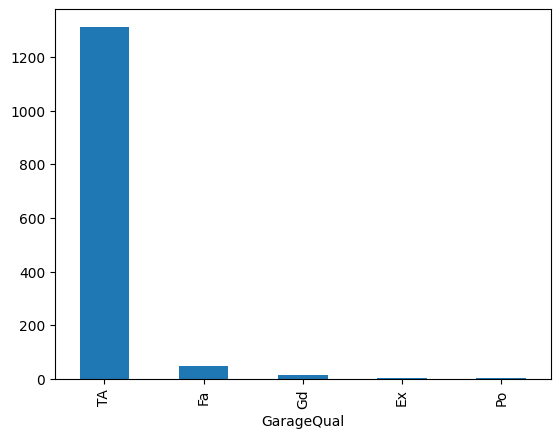

In [9]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'garage_qual')

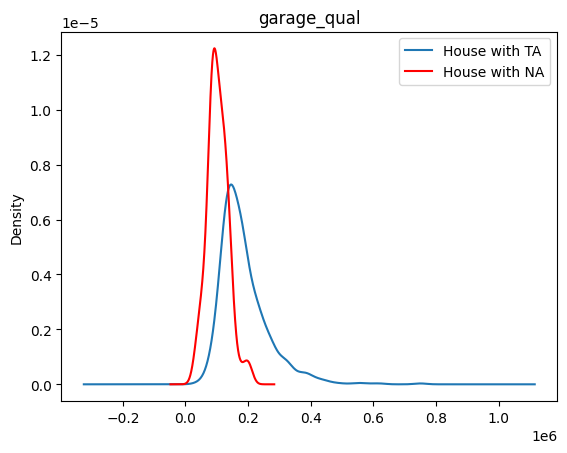

In [14]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines , labels = ax.get_legend_handles_labels()

labels=['House with TA', 'House with NA']
ax.legend(lines, labels, loc='best')
plt.title('garage_qual')

In [16]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [17]:
df['GarageQual'].fillna('TA', inplace=True)

<Axes: xlabel='GarageQual'>

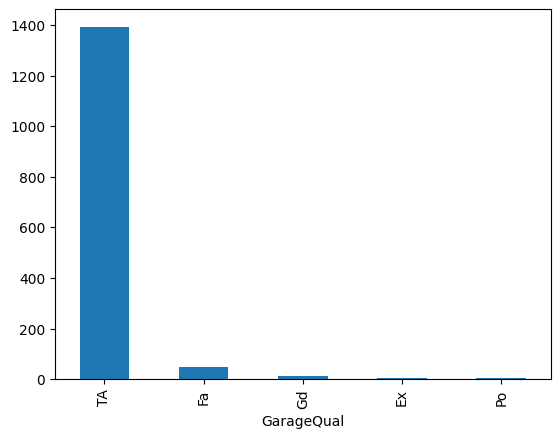

In [18]:
df['GarageQual'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'garage_qual')

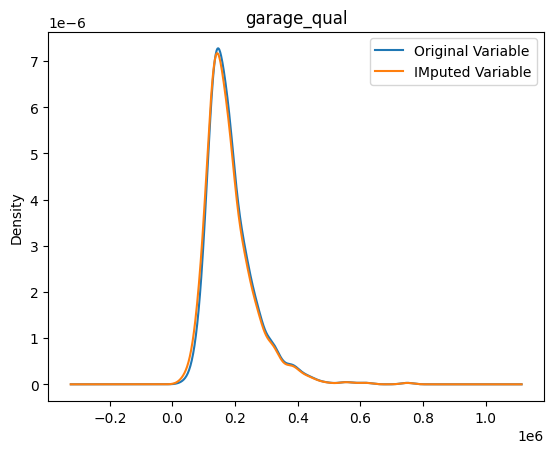

In [19]:
## After replacing with the highest frequency element in the GarageQual

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
temp.plot(kind='kde', ax=ax)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

lines , labels = ax.get_legend_handles_labels()

labels=['Original Variable', 'IMputed Variable']
ax.legend(lines, labels, loc='best')
plt.title('garage_qual')

<Axes: xlabel='FireplaceQu'>

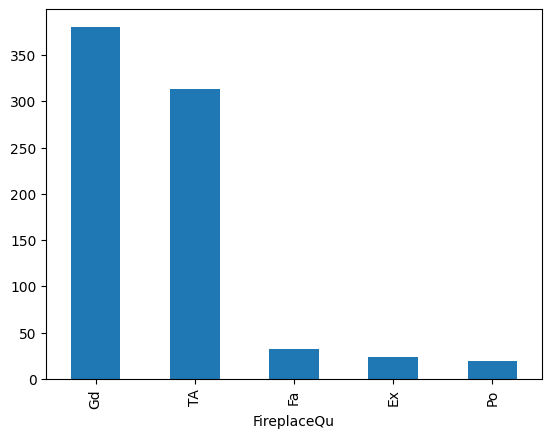

In [23]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'garage_qual')

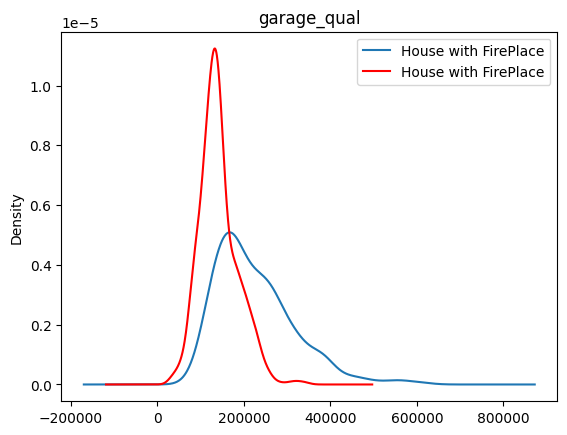

In [25]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines , labels = ax.get_legend_handles_labels()

labels=['House with FirePlace', 'House with FirePlace']
ax.legend(lines, labels, loc='best')
plt.title('garage_qual')

In [27]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']

In [28]:
df['FireplaceQu'].fillna('Gd' , inplace=True)

<Axes: xlabel='FireplaceQu'>

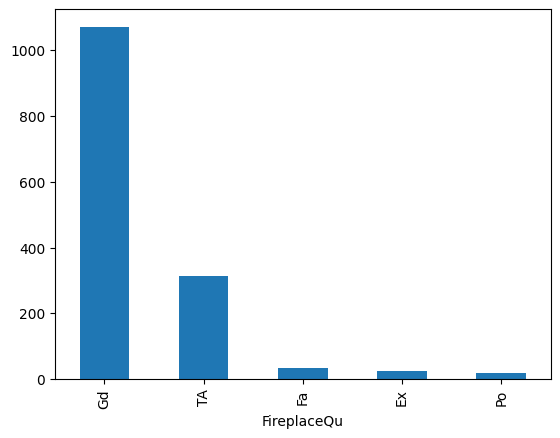

In [30]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

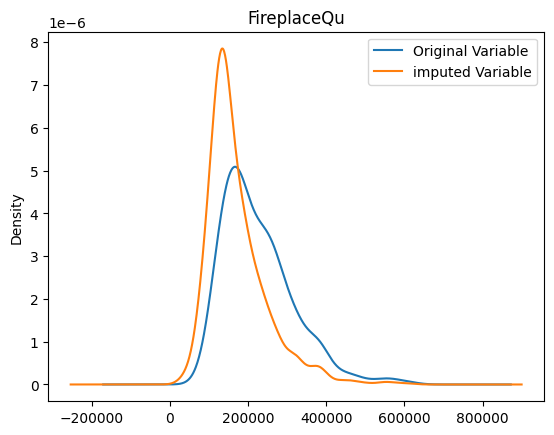

In [31]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
temp.plot(kind='kde', ax=ax)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

lines , labels = ax.get_legend_handles_labels()

labels=['Original Variable', 'imputed Variable']
ax.legend(lines, labels, loc='best')
plt.title('FireplaceQu')

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2)

In [35]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
#imputer=SimpleImputer(strategy='constant', fill_value='Missing') 

In [37]:
X_train_imputed=imputer.fit_transform(X_train)
X_test_imputed=imputer.transform(X_test)

In [38]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)